In [3]:
import sys
import time
import traceback
import os
from arduino_iot_cloud import ArduinoCloudClient
import csv 
import time
import plotly.io as pio
import plotly.express as px
import pandas as pd
import seaborn as sns
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt


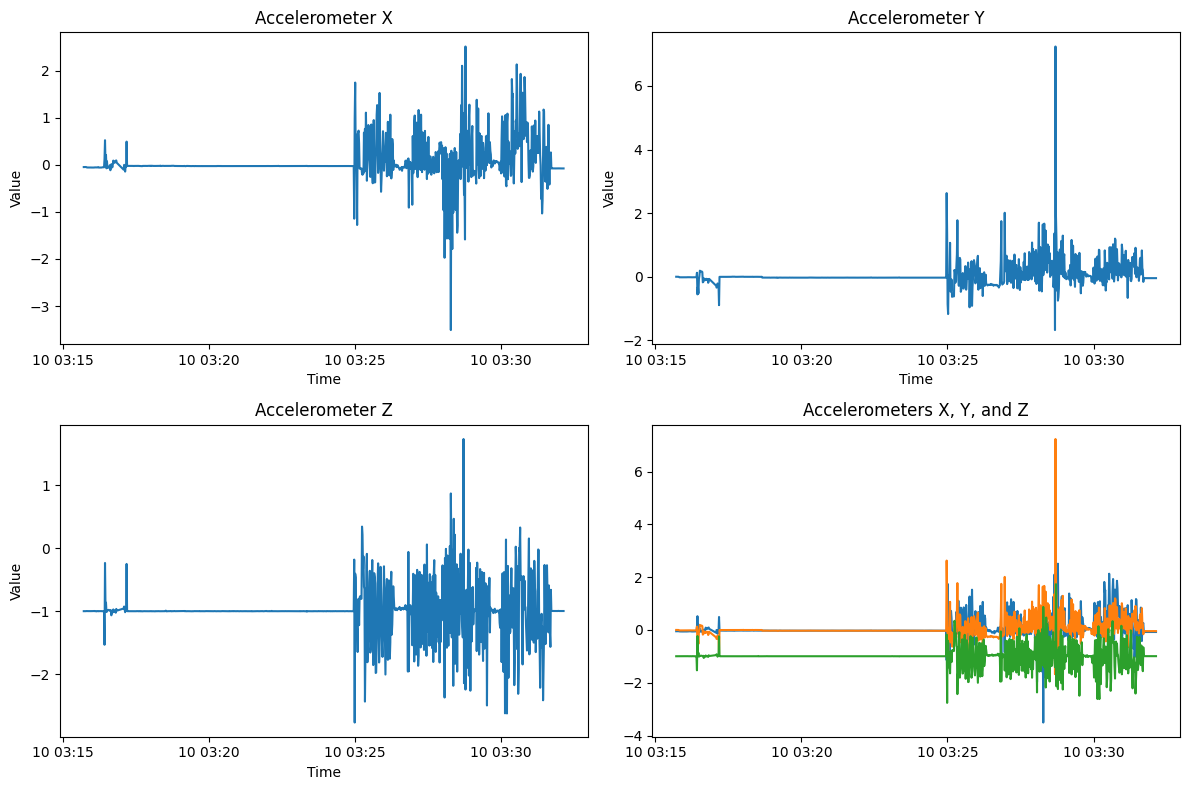

In [4]:

# Load the data
accelerometer_x = pd.read_csv('accelerometer_x.csv')
accelerometer_y = pd.read_csv('accelerometer_y.csv')
accelerometer_z = pd.read_csv('accelerometer_z.csv')

accelerometer_x.time = pd.to_datetime(accelerometer_x.time)
accelerometer_y.time = pd.to_datetime(accelerometer_y.time)
accelerometer_z.time = pd.to_datetime(accelerometer_z.time)

# Plotting accelerometer_x
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(accelerometer_x['time'], accelerometer_x['value'])
plt.title('Accelerometer X')

# Plotting accelerometer_y
plt.subplot(2, 2, 2)
plt.plot(accelerometer_y['time'], accelerometer_y['value'])
plt.title('Accelerometer Y')

# Plotting accelerometer_z
plt.subplot(2, 2, 3)
plt.plot(accelerometer_z['time'], accelerometer_z['value'])
plt.title('Accelerometer Z')

# Plotting all three accelerometers
plt.subplot(2, 2, 4)
plt.plot(accelerometer_x['time'], accelerometer_x['value'], label='X')
plt.plot(accelerometer_y['time'], accelerometer_y['value'], label='Y')
plt.plot(accelerometer_z['time'], accelerometer_z['value'], label='Z')
plt.title('Accelerometers X, Y, and Z')


for i in range(3):
    plt.subplot(2,2,i+1)
    plt.xlabel('Time')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [5]:
### Receiving the data from Python

In [6]:

# Initialize Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='live-update-graph'),
    dcc.Interval(id='interval-component', interval=1000, n_intervals=0)  # Update every second  
])

@app.callback(
    Output('live-update-graph', 'figure'),
    Input('interval-component', 'n_intervals')
)

def update_graph(n_intervals):
    global cur_data
    # Convert to DataFrame for Plotly
    df = pd.DataFrame(cur_data, columns=['index','Timestamp', 'X', 'Y', 'Z'])
    fig = px.line(df, x= 'Timestamp', y = ['X','Y','Z'])  # Scatter plot

    return fig

In [23]:
import sys
import time
import traceback
import os
from arduino_iot_cloud import ArduinoCloudClient
import csv

DEVICE_ID = "ad32580c-c517-4b9f-992b-a0d97513d28c"
SECRET_KEY = "U0wz4F3z4CTQ5SRoruqQJH0ua"

# Define the variables to store the accelerometer data
cur_data = []
temp_data = []
x, y, z = 0, 0, 0
count = 0
N_SAMPLES = 20

# =============================================================================
# Define the callback function for accelerometer_x changes
def on_accelerometer_x_changed(client, value):
    global x
    x = value

# Define the callback function for accelerometer_y changes
def on_accelerometer_y_changed(client, value):
    global y
    y = value

# Define the callback function for accelerometer_z changes
def on_accelerometer_z_changed(client, value):
    global z
    z = value
            
#================================= MAIN FUNCTION =================================
if __name__ == "__main__":
    try:
        # Instantiate Arduino cloud client
        client = ArduinoCloudClient(device_id=DEVICE_ID, username=DEVICE_ID, password=SECRET_KEY, sync_mode = True)
        
        # Register the callback functions
        client.register("py_x", value=None, on_write=on_accelerometer_x_changed)
        client.register("py_y", value=None, on_write=on_accelerometer_y_changed)
        client.register("py_z", value=None, on_write=on_accelerometer_z_changed)

        client.start()

        # Keep the client running
        while True:
            if x is not None and y is not None and z is not None:
                if count < N_SAMPLES:
                    count += 1
                    timestamp = time.strftime('%Y-%m-%d %H:%M:%S')
                    temp_data.append([count,timestamp,x,y,z])
                    print([count,timestamp,x,y,z])
                    x, y, z = None, None, None
                else:
                    timestamp = time.strftime('%Y-%m-%d_%H-%M-%S')
                    df = pd.DataFrame(temp_data, columns=['index','Timestamp', 'X', 'Y', 'Z'])
                    df.to_csv(f"csv_{timestamp}.csv")
                    fig = px.line(df, x= 'Timestamp', y = ['X','Y','Z'])  # Scatter plot
                    filename = f"images/plot_{timestamp}.png"  # Correct filename format
                    pio.write_image(fig, filename)
                    count = 0
                    cur_data = temp_data.copy()
                    temp_data.clear()
            client.update()
    except:
        exc_type, exc_value, exc_traceback = sys.exc_info()
        traceback.print_tb(exc_traceback, file=sys.stdout)

[1, '2025-04-25 10:46:02', 0, 0, 0]
[2, '2025-04-25 10:46:02', 0.92822265625, -0.7158966064453125, 0.605926513671875]
[3, '2025-04-25 10:46:03', 0.5946502685546875, -0.776153564453125, 0.7232513427734375]
[4, '2025-04-25 10:46:04', -1.7592926025390625, 0.0713653564453125, 0.5216064453125]
[5, '2025-04-25 10:46:05', -1.8622894287109375, -0.2660369873046875, 0.2682342529296875]
[6, '2025-04-25 10:46:06', -0.3716583251953125, -0.691802978515625, -0.5076751708984375]
[7, '2025-04-25 10:46:07', 1.2252960205078125, -0.959075927734375, -0.545806884765625]
[8, '2025-04-25 10:46:08', 2.9534454345703125, -0.3296356201171875, 0.1856536865234375]
[9, '2025-04-25 10:46:09', -4.144134521484375, -0.2123260498046875, -1.510894775390625]
[10, '2025-04-25 10:46:10', 0.736358642578125, 1.613037109375, 0.9402313232421875]
[11, '2025-04-25 10:46:11', -0.733917236328125, 1.703399658203125, 0.7115478515625]
[12, '2025-04-25 10:46:12', -1.3784027099609375, 3.31463623046875, -0.024322509765625]
[13, '2025-04-2

In [24]:
app.run_server(debug_mode = True, jupyter_tab = True)

In [26]:
_df = pd.read_csv("csv_2025-04-25_10-46-22.csv")
_df.drop(columns ={"Unnamed: 0", "index"}, inplace = True)
_df.Timestamp = pd.to_datetime(_df.Timestamp)
_df.set_index("Timestamp", inplace = True)

In [27]:
act_1 = _df.between_time("01:15:40", "01:16:30")
act_2 = _df.between_time("01:16:50", "01:18:30")
act_3 = _df.between_time("01:21:10", "01:22:40")
act_4 = _df.between_time("01:24:45", "01:25:15")
act_5 = _df.between_time("01:30:00", "01:30:40")

In [28]:
act_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       0 non-null      float64
 1   Y       0 non-null      float64
 2   Z       0 non-null      float64
dtypes: float64(3)
memory usage: 0.0 bytes


<Axes: xlabel='Timestamp', ylabel='X'>

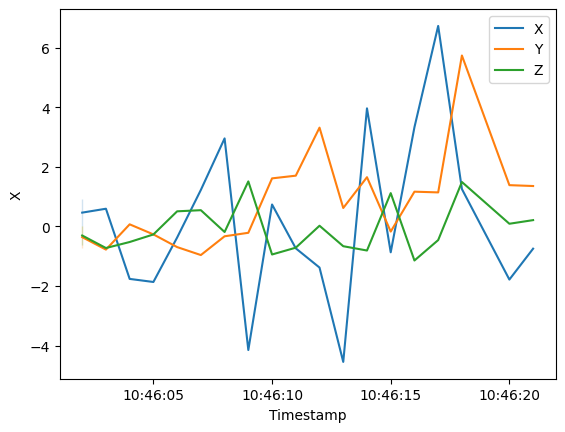

In [29]:
figsize = (16,9)
sns.lineplot(x=_df.index, y=_df["X"], label="X")
sns.lineplot(x=_df.index, y=_df["Y"], label="Y")
sns.lineplot(x=_df.index, y=-df["Z"], label="Z")

C:\Users\HP\AppData\Local\Temp\ipykernel_12988\1996174763.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\HP\AppData\Local\Temp\ipykernel_12988\1996174763.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\HP\AppData\Local\Temp\ipykernel_12988\1996174763.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\HP\AppData\Local\Temp\ipykernel_12988\1996174763.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\HP\AppData\Local\Temp\ipykernel_12988\199617476

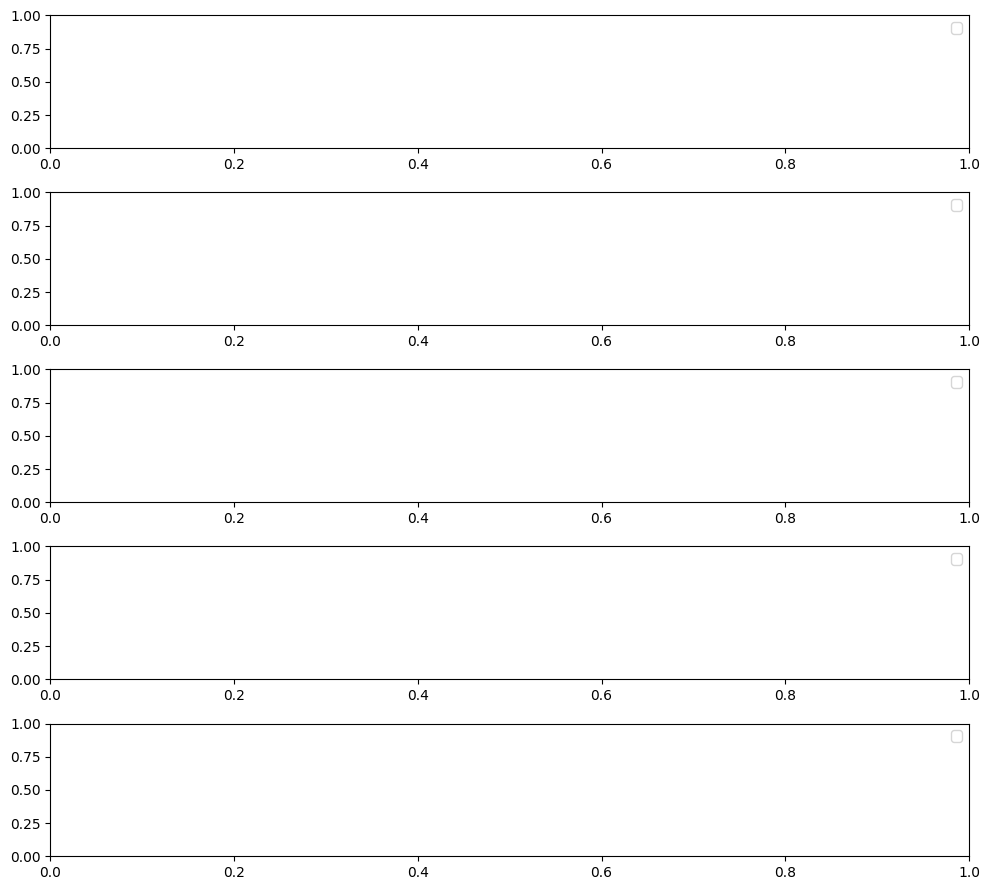

In [30]:
fig, ax = plt.subplots(5, figsize = (10,9))

for i, data in enumerate([act_1,act_2,act_3,act_4,act_5]):
    sns.lineplot(x=data.index, y=data["X"], label="X", ax = ax[i])
    sns.lineplot(x=data.index, y=data["Y"], label="Y", ax = ax[i])
    sns.lineplot(x=data.index, y=data["Z"], label="Z", ax = ax[i])
    ax[i].legend()

plt.tight_layout()
plt.show()

In [31]:
act_1.describe()

,X,Y,Z
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [32]:
act_2.describe()

,X,Y,Z
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN
